Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Artem Glushak"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        L = 0
        n = len(self.yk)
        m = len(self.xk)
        for i in range(n):
          l = 1
          for j in range(m):
            if j != i:
              l *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
          L += l * self.yk[i]
        return L

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)
import matplotlib.pyplot as plt

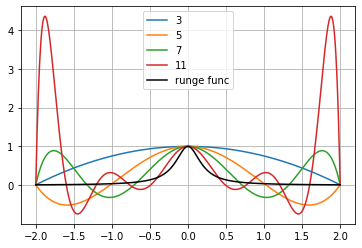

In [5]:
fig, ax = plt.subplots()
x_full = np.linspace(-2, 2, 500)
y_full = runge_func(x_full)


for m in [3, 5, 7, 11]:
  y_new = []
  x_pol = np.linspace(-2, 2, m)
  y_pol = runge_func(x_pol)
  lagr = LagrangeInterpolator(x_pol, y_pol)
  for k in range(len(x_full)):
    y_new.append(lagr(x_full[k]))
  message_template = str(m)
  ax.plot(x_full, y_new, label=message_template)
ax.plot(x_full, y_full, color='black', label='runge func')
plt.legend()
plt.grid()

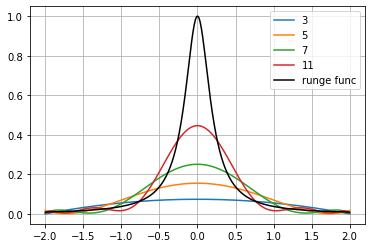

In [6]:
def nodes_chebushev(n):
    k = np.arange(n)
    return 2*np.cos((2*k+1) * np.pi / (2*n+2))

fig, ax = plt.subplots()
x_full = np.linspace(-2, 2, 500)
y_full = runge_func(x_full)


for m in [3, 5, 7, 11]:
  y_new = []
  x_pol = nodes_chebushev(m)
  y_pol = runge_func(x_pol)
  lagr = LagrangeInterpolator(x_pol, y_pol)
  for k in range(len(x_full)):
    y_new.append(lagr(x_full[k]))
  message_template = str(m)
  ax.plot(x_full, y_new, label=message_template)
ax.plot(x_full, y_full, color='black', label='runge func')
plt.legend()
plt.grid()

Использование узлов чебышева позволяет повысить точность интерполяции. Хотя в окрестности точки (0,0), в случае Чебышева приближение не достигает значения функции, но зато, уже начиная c m=5, узлы позволяют предсказать характер поведения функции, экстремуы, точки перегиба и тд.